<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW6/problem2_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Katrina Cwiertniewicz
//*** Introduction to Data Science IS1
//***10/8/2025
//*** Project 6: Problem 2 R
###The purpose of this assignment is to perform data analysis on the loans_training and loans_test dataset in R.

In [41]:
install.packages("C50")
install.packages("rpart")
install.packages("rpart.plot")
library(rpart.plot)
library(rpart)
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
trainingDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/refs/heads/main/HW6/Loans_Training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/refs/heads/main/HW6/Loans_Test.csv")

**Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.**

*   *Target*: Approval
*   *Predictors*: Debt-to-Income Ratio, FICO Score, Request Amount, Interest




In [43]:
model1 <- rpart(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest, data = trainingDF, method="class")

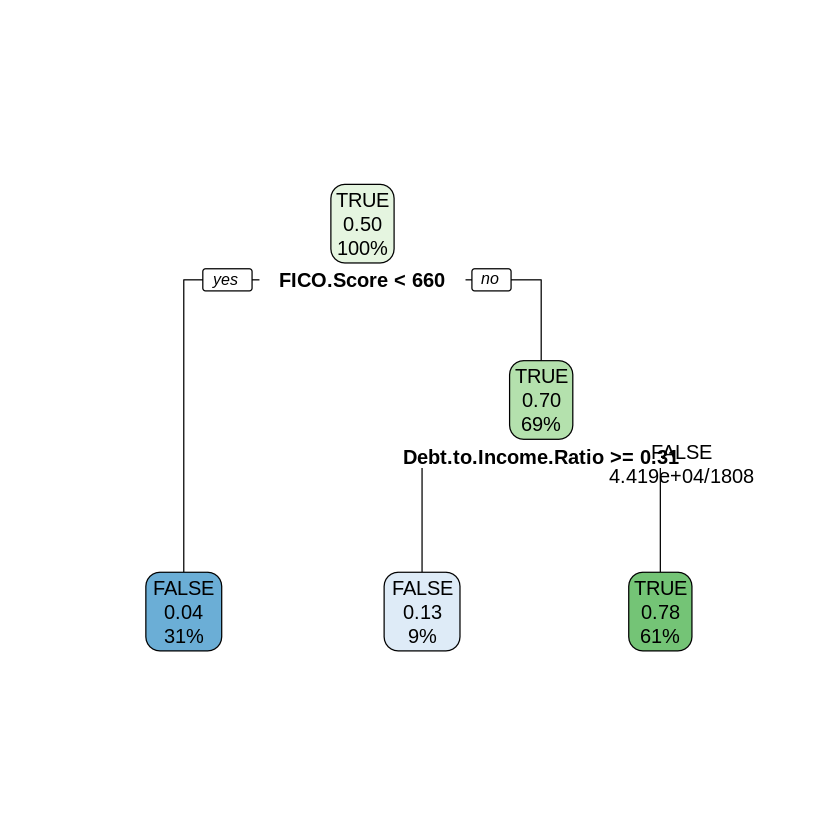

In [44]:
rpart.plot(model1)
text(model1, use.n=TRUE)

##CART Model Summary

While reviewing the model, the two predictor variables chosen were FICO and Debt-to-Income Ratio. First, FICO splits the data 31/69 on whether a FICO score is less than 660. Stating that a FICO score is a good predictor for splitting data to determine loan approval. False is a terminal node as the approval for the loan is considered denied. After this, the Debt-to-Income Ratio is chosen to split 9/61 on whether the number is greater than ~31. The model stops after this split as it has considered the major factors that affect the data. This TRUE indicator represents 61% of the data.

In [45]:
summary(model1)

Call:
rpart(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score + 
    Request.Amount + Interest, data = trainingDF, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0036634 0.002582306
2 0.1267551      1 0.4353502 0.4355234 0.002130699
3 0.0100000      2 0.3085951 0.3089148 0.001865565

Variable importance
          FICO.Score Debt.to.Income.Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request.Amount       < 25500 to the right, improve= 1191.854, (0 missing)
      Interest             < 11475 to th

**Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.**

*   *Target*: Approval
*   *Predictors*: Debt-to-Income Ratio, FICO Score, Request Amount, Interest

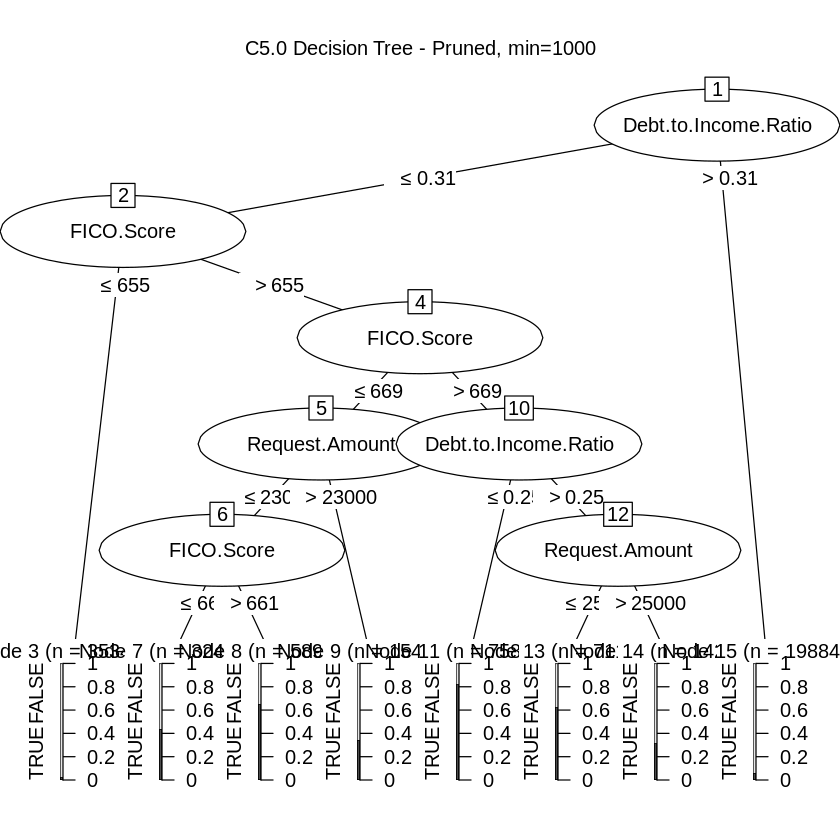

In [46]:
#Changing Approval to a factor
trainingDF$Approval<-as.factor(trainingDF$Approval)

model2 <- C5.0(Approval ~ Debt.to.Income.Ratio + FICO.Score + Request.Amount + Interest, data = trainingDF, control = C5.0Control(noGlobalPruning = FALSE, minCases=1000))
plot(model2, main="C5.0 Decision Tree - Pruned, min=1000")

##C5 Model Summary

This model uses the predictors FICO, Debt-to-Income Ratio and Request Amount to split the data. The first split uses Debt-to-Income Ratio to split the ratio of ~31. Then FICO score is split two more times of scores >655 and >669. After this step, various predictors split the data.


In [47]:
summary(model2)


Call:
C5.0.formula(formula = Approval ~ Debt.to.Income.Ratio + FICO.Score
 + Request.Amount + Interest, data = trainingDF, control
 = C5.0Control(noGlobalPruning = FALSE, minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Sat Oct 11 22:32:12 2025
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)



**How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.**

Testing the Data

Model 1

In [48]:
predict(model1, testDF, type="prob")

,FALSE,TRUE
1,0.9606974,0.03930264
2,0.9606974,0.03930264
3,0.9606974,0.03930264
4,0.9606974,0.03930264
5,0.9606974,0.03930264
6,0.9606974,0.03930264
7,0.9606974,0.03930264
8,0.9606974,0.03930264
9,0.9606974,0.03930264
10,0.9606974,0.03930264


Model 2

In [49]:
predict(model2, testDF, type="prob")

,FALSE,TRUE
1,0.9746937,0.02530627
2,0.9746937,0.02530627
3,0.9746937,0.02530627
4,0.9746937,0.02530627
5,0.9746937,0.02530627
6,0.9746937,0.02530627
7,0.9746937,0.02530627
8,0.9746937,0.02530627
9,0.9746937,0.02530627
10,0.9746937,0.02530627


##Similarities
Both CART and C5.0 used the same predictors FICO and Debt-to-Income Ratio to split factors. For the split Debt-to-Income, it used the same ratio of ~31 to split the data.

Both data models had similar error ratios of about 15%. When testing the models, some of the ratios were very similar while others had differences of 5 points to determine whether an approval was True or False. Although the models didn't have exactly the same ratios they still both determined the same outcomes leaning to false for most approvals. This would make sense, as most loan companies would most likely send out more denials than approvals.


##Differences
CART used FICO as the first predictor instead of Debt-to-Income Ratio. The true approval is selected for only one node category. This model only splits the data twice to find approval. This resulted in a tree that generalizes on two factors. This may help with approvals that have strong indicators for FICO and Debt-to-Income Ratio but may create errors when other factors may help decide a more accurate result when values are very close to the determining split.

C5.0 used an additional predictor Request Amount to split the data. In terms of loan approval, I think including Request Amount should affect if a loan is approved or not. For a company, there would be a major difference in repayment if someone isn't able to pay back a few hundred dollars vs. a few thousand dollars. This model uses the predictor Debt-to-Income Ratio first instead of FICO. After this it splits between many factors. This ends up with various leaf nodes instead of 1 indicating for true approval. This model could be helpful when the loan application includes the other predictor variables that could change whether an approval is true or false. Using 1000 as the minimum of cases per terminal also helps the data avoid overfitting the data.